# **Support Vector Machines**

## **Multiclass Classification using Support Vector Machine**

**Importing all the required libraries**

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**Importing Dataset**

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Hyperparameter Tuning**
*   For **RBF kernel**, we tune 'gamma' and 'penalty term (C)'. 
*   For **Polynomial kernel**, we tune 'degree' and 'penalty term (C)'. 

For the multiclass classification, the type one-versus-one will be specified, i.e. use decision_function_shape=’ovo’.

All other parameters are set to default. 

*NOTE: We select the hyperparameters that give us highest accuracy.*

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4],
    'gamma': [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
}
c_rbf, gamma_rbf = 0, 0

### RBF Kernel
svm_rbf = SVC(kernel='rbf', decision_function_shape='ovo')

# Perform grid search for RBF kernel (perform cross-validation and gives params for best mean cross-validation accuracy score)
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train, y_train)

# Get the best hyperparameters for RBF kernel
# accuracy_rbf = grid_search_rbf.best_score_
optimal_params_rbf = grid_search_rbf.best_params_
c_rbf = optimal_params_rbf['C']
gamma_rbf = optimal_params_rbf['gamma']

print("Best pair of hyperparameters (C, Gamma) for RBF Kernel is (" + str(c_rbf) + ", " + str(gamma_rbf) + ")")

d_poly, c_poly = 0, 0
### Polynomial Kernel
# Define the parameter grid for polynomial kernel
param_grid_poly = {
    'C': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4],
    'degree': [1, 2, 3, 4, 5]
}
# Create the SVM classifier with polynomial kernel
svm_poly = SVC(kernel='poly', decision_function_shape='ovo')

# Perform grid search for polynomial kernel
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

# Get the best hyperparameters for polynomial kernel
# accuracy_poly = grid_search_poly.best_score_
optimal_params_poly = grid_search_poly.best_params_
c_poly = optimal_params_poly['C']
d_poly = optimal_params_poly['degree']

print("Best pair of hyperparameters (Degree, Gamma) for Poly Kernel is (" + str(d_poly) + ", " + str(c_poly) + ")")

Best pair of hyperparameters (C, Gamma) for RBF Kernel is (0.2, 0.4)
Best pair of hyperparameters (Degree, Gamma) for Poly Kernel is (1, 0.8)


In [5]:
rbf = svm.SVC(kernel='rbf', gamma=gamma_rbf, C=c_rbf, decision_function_shape='ovo')
poly = svm.SVC(kernel='poly', degree=d_poly, C=c_poly, decision_function_shape='ovo')

rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)

SVC(C=0.8, decision_function_shape='ovo', degree=1, kernel='poly')

**Testing the model**

In [6]:
poly_pred, rbf_pred = None, None
rbf_pred = rbf.predict(X_test)
poly_pred = poly.predict(X_test)

**Models Evaluation**

In [7]:
rbf_accuracy, rbf_f1 = None, None
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  70.00
F1 (RBF Kernel):  70.55


In [8]:
poly_accuracy = None
poly_f1 = None
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  73.33
F1 (Polynomial Kernel):  74.13


**Visualising Results**

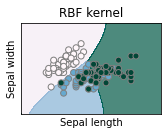

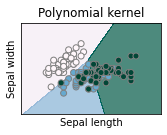

In [9]:
#stepsize in the mesh, it alters the accuracy of the plotprint
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# create the title that will be shown on the plot
titles = ['RBF kernel','Polynomial kernel']

for i, clf in enumerate((rbf, poly)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

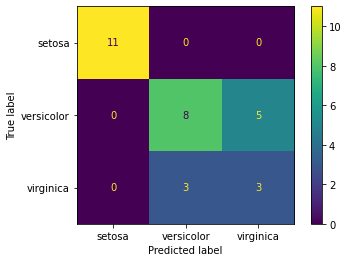

In [10]:
# creating a confusion matrix: polynomial kernel
# Define class labels
class_names = iris.target_names
cm_poly = confusion_matrix(y_test, poly_pred)
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly,display_labels=class_names)
# Plot confusion matrix
disp_poly.plot()

# Show the plot
plt.show()

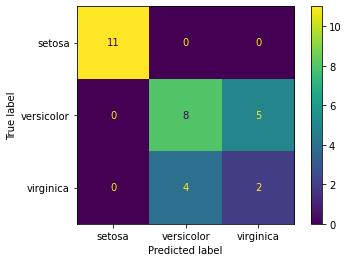

In [11]:
# creating a confusion matrix: rbf kernel
# Define class labels
class_names = iris.target_names
cm_rbf = confusion_matrix(y_test, rbf_pred)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf,display_labels=class_names)
# Plot confusion matrix
disp_rbf.plot()

# Show the plot
plt.show()

# **Logistic Regression**



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
classifier = None
classifier_score = 0
classifier = LogisticRegression(penalty='l2',random_state=0,multi_class='auto')
classifier.fit(X_train,y_train)
classifier_score = classifier.score(X_test, y_test)

print('Logistic Regression Classifier Score : ', "%.2f" % (classifier_score*100))

Logistic Regression Classifier Score :  73.33
